In [15]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

np.random.seed(10101)

# Importance sampling

The following example is taken from $\textit{Monte Carlo Simulation with Applications to Finance}$ (Hui Wang, CRC), pag 136.

Price a binary (cash-or-nothing) call with and without importance sampling.

We first of all set the fundamental parameters of the problem, and compute the exact solution via the known Black-Scholes expression.

In [40]:
T = 1
n = 10000

S0 = 50
s = 0.1
r = 0.01
K = 60

d2 = (np.log(S0/K)+(r-s**2/2)*T)/np.sqrt(s**2*T)
c = np.exp(-r*T)*sts.norm.cdf(d2)
print('Black-Scholes price: ',c)

Black-Scholes price:  0.03771743020286561


The price $S_T$ is sampled as a Geometric Brownian Motion at time $T$, and the sample mean and standard deviation of the risk-neutral price are computed. At this purpose, recall that $S_T\ge K$ can be rewritten as:
$$ S_T=S_0\exp\left[\left(r-\frac{\sigma^2}2\right)T+\sigma W_T\right]\ge K\Rightarrow W_T=TX\ge \dfrac{\log{\frac K{S_0}}-\left(r-\frac{\sigma^2}2\right)T}\sigma=:Tb,$$
where $X\sim\mathcal N(0,1)$, so that sampling $S_T$ consists in sampling $\mathbb E\left[e^{-rT}1_{X\ge b}\right]$.

In [41]:
b = (np.log(K/S0)-(r-s**2/2)*T)/np.sqrt(s**2*T)
X = np.random.normal(size = n)

X_sample_mean = ( np.exp(-r*T)*np.array(X >= b) ).mean()
X_sample_sdev = ( np.exp(-r*T)*np.array(X >= b) ).std()

Set up another normal variable, with mean equal to the strike of the option, and compute the risk-neutral expectations

In [42]:
Y = np.random.normal(loc = b, size = n)

Y_sample_mean = ( np.exp(-r*T)*np.array(Y >= b)*sts.norm.pdf(Y)/sts.norm.pdf(Y, loc = b) ).mean()
Y_sample_sdev = ( np.exp(-r*T)*np.array(Y >= b)*sts.norm.pdf(Y)/sts.norm.pdf(Y, loc = b) ).std()

Compare prices and standard deviations:

In [43]:
print(X_sample_mean,Y_sample_mean,c)
print(X_sample_sdev,Y_sample_sdev)

0.03663184384871921 0.037881691391798054 0.03771743020286561
0.18688354376079502 0.05472928539566589


What I see is that when increasing $K$, and thus decreasing the portion of $X$'s contributing to the expectation, importance sampling generates an estimate with consistently lower standard deviation wrt normal sampling, showing that it is actually a variance reduction technique.

One can plot the likelihood ratio $\phi(Y)/\phi(Y-b)$ appearing in the expectation, as a function of $Y-b$, just to see how different parts of the importance-sampled variable are weighted. Since the portion before $b$ should appear more during a normal sampling, its values are boosted by the likelihood ratio (the likelihood of $X\ge b$ is way less than $X<b$). But this portion of the expectation is anyway null, as the indicator function kills it. Therefore, the expectation is still unbiased. On the other hand, the variance is reduced.

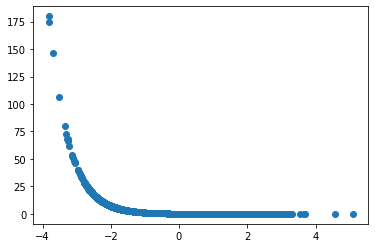

In [47]:
plt.scatter(Y-b,sts.norm.pdf(Y)/sts.norm.pdf(Y, loc = b))